In [1]:
import numpy as np
import math
from keras import optimizers
from utils import *
from model import *

/home/fan/anaconda3/envs/keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Download the raw dataset if necessary

In [2]:
SBU_dir ='/home/fan/projects/skeleton/data/SBU/'

In [3]:
#Download dataset
'''
link = []
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s01s02.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s01s03.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s01s07.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s02s01.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s02s03.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s02s06.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s02s07.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s03s02.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s03s04.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s03s05.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s03s06.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s04s02.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s04s03.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s04s06.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s05s02.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s05s03.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s06s02.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s06s03.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s06s04.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s07s01.zip')
link.append('http://vision.cs.stonybrook.edu/~kiwon/Datasets/SBU_Kinect_Interactions/s07s03.zip')

import wget
for i in link:
    temp_path = SBU_dir + i.split('/')[-1]
    url = i
    print(url)
    print(temp_path)
    wget.download(url=url, out=temp_path)
'''

# Assign the dataset by choose folder 3 as test set

In [3]:
dataset = SBU_dataset(SBU_dir)
train, test = dataset.get_data(3) # slected from 0,1,2,3,4

loading data from: /home/fan/projects/skeleton/data/SBU/
test set folder should be slected from 0 ~ 4
slected test folder 3 includes: ['s02s01', 's02s06', 's03s02', 's03s06']


# Initialize the model

In [4]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [6]:
lr=0.001
adam = optimizers.Adam(lr)
model = multi_obj()
model.compile(adam, loss='mean_squared_error')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inp_j_0 (InputLayer)            (None, 16, 15, 3)    0                                            
__________________________________________________________________________________________________
inp_j_diff_0 (InputLayer)       (None, 16, 15, 3)    0                                            
__________________________________________________________________________________________________
inp_j_1 (InputLayer)            (None, 16, 15, 3)    0                                            
__________________________________________________________________________________________________
inp_j_diff_1 (InputLayer)       (None, 16, 15, 3)    0                                            
__________________________________________________________________________________________________
model_3 (M

# Train the model

In [19]:
epochs = 400
for e in range(epochs):
    X_0 = []
    X_1 = []
    X_2 = []
    X_3 = []
    Y = []

    for i in range(1,9):                 # loop 8 classes
        for j in range(len(train[i])):   # loop all samples within the same class
            
            #First person pose
            p_0 = np.copy(train[i][j].T[:,:45])
            p_0 = p_0.reshape([-1,15,3])
            t_0 = p_0.shape[0]           # the number of all frames
            if t_0>16:                   # sample the range from crop size of [16,t_0]
                ratio = np.random.uniform(1,t_0/16)
                l = int(16*ratio)
                start = random.sample(range(t_0-l),1)[0]
                end = start+l
                p_0 = p_0[start:end,:,:]
                p_0 = zoom(p_0)
            elif t_0<16:
                p_0 = zoom(p_0)

            #Second person pose
            p_1 = np.copy(train[i][j].T[:,45:])
            p_1 = p_1.reshape([-1,15,3])
            t_1 = p_1.shape[0]
            if t_1 >16:  
                ratio = np.random.uniform(1,t_1/16)
                l = int(16*ratio)
                start = random.sample(range(t_1-l),1)[0]
                end = start+l
                p_1 = p_1[start:end,:,:]
                p_1 = zoom(p_1)
            elif t_1 <16:
                p_1 = zoom(p_1)
            
            # randomly mirror augmentation 
            # since two persions' postion could be switched
            if np.random.choice([0,1],1): 
                p_0, p_1 = mirror(p_0,p_1)
            
            #Calculate the temporal difference
            p_0_diff = p_0[1:,:,:]-p_0[:-1,:,:]
            p_0_diff = np.concatenate((p_0_diff,np.expand_dims(p_0_diff[-1,:,:],axis=0)))
            p_1_diff = p_1[1:,:,:]-p_1[:-1,:,:]
            p_1_diff = np.concatenate((p_1_diff,np.expand_dims(p_1_diff[-1,:,:],axis=0)))

            X_0.append(p_0)
            X_1.append(p_0_diff)
            X_2.append(p_1)
            X_3.append(p_1_diff)

            label = np.zeros(8)
            label[i-1] = 1
            Y.append(label)

    X_0 = np.stack(X_0)
    X_1 = np.stack(X_1)
    X_2 = np.stack(X_2)
    X_3 = np.stack(X_3)
    Y = np.stack(Y)    

    history = model.fit([X_0,X_1,X_2,X_3],Y,batch_size=32,epochs=1,verbose=True,shuffle=True)
    
    if not (e+1)%50:
        lr *= 0.8
        adam = optimizers.Adam(lr)
        model.compile(adam, loss='mean_squared_error')


Epoch 1/1
216/216 [==============================] - 3s 12ms/step - loss: 0.0011
Epoch 1/1
216/216 [==============================] - 0s 984us/step - loss: 0.0012
Epoch 1/1
216/216 [==============================] - 0s 903us/step - loss: 0.0013
Epoch 1/1
216/216 [==============================] - 0s 790us/step - loss: 0.0013
Epoch 1/1
216/216 [==============================] - 0s 775us/step - loss: 5.5415e-04
Epoch 1/1
216/216 [==============================] - 0s 784us/step - loss: 0.0011
Epoch 1/1
216/216 [==============================] - 0s 850us/step - loss: 0.0033
Epoch 1/1
216/216 [==============================] - 0s 911us/step - loss: 0.0023
Epoch 1/1
216/216 [==============================] - 0s 719us/step - loss: 0.0015
Epoch 1/1
216/216 [==============================] - 0s 787us/step - loss: 0.0014
Epoch 1/1
216/216 [==============================] - 0s 842us/step - loss: 0.0018
Epoch 1/1
216/216 [==============================] - 0s 942us/step - loss: 0.0028
Epoch 1/1
216

# Test model

In [22]:
X_TEST_0 = []
X_TEST_1 = []
X_TEST_2 = []
X_TEST_3 = []
Y_TEST = []

for i in range(1,9):
    for j in range(len(test[i])):
        p_0 = np.copy(test[i][j].T[:,:45])
        p_0 = p_0.reshape([-1,15,3])
        t_0 = p_0.shape[0]
        # if the number of frame is more than 20, crop by scale 0.9, then rescale by interploration again
        if t_0>=20: 
            p_0 = p_0[int(t_0*0.05):int(t_0*0.95),:,:]
            p_0 = zoom(p_0)
        elif t_0<20:
            p_0 = zoom(p_0)
        p_0_diff = p_0[1:,:,:]-p_0[:-1,:,:]
        p_0_diff = np.concatenate((p_0_diff,np.expand_dims(p_0_diff[-1,:,:],axis=0)))
        
        p_1 = np.copy(test[i][j].T[:,45:])
        p_1 = p_1.reshape([-1,15,3])
        t_1 = p_1.shape[0]
        if t_1 >=20:  
            p_1 = p_1[int(t_1*0.05):int(t_1*0.95),:,:]
            p_1 = zoom(p_1)
        elif t_1 <20:
            p_1 = zoom(p_1)
        p_1_diff = p_1[1:,:,:]-p_1[:-1,:,:]
        p_1_diff = np.concatenate((p_1_diff,np.expand_dims(p_1_diff[-1,:,:],axis=0)))

        X_TEST_0.append(p_0)
        X_TEST_1.append(p_0_diff)
        X_TEST_2.append(p_1)
        X_TEST_3.append(p_1_diff)
        
        label = np.zeros(8)
        label[i-1] = 1
        Y_TEST.append(label)

X_TEST_0 = np.stack(X_TEST_0)
X_TEST_1 = np.stack(X_TEST_1)
X_TEST_2 = np.stack(X_TEST_2)
X_TEST_3 = np.stack(X_TEST_3)
Y_TEST = np.stack(Y_TEST)

Y_pred = model.predict([X_TEST_0,X_TEST_1,X_TEST_2,X_TEST_3])

print('Predict labels:',np.argmax(Y_pred,axis=1))
print('Ground truth labels:',np.argmax(Y_TEST,axis=1))

Predict labels: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 5 5 4 4 4 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 0 7]
Ground truth labels: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 4 4 4 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]


# Visulize the mirror augmentation

/home/fan/anaconda3/envs/keras/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


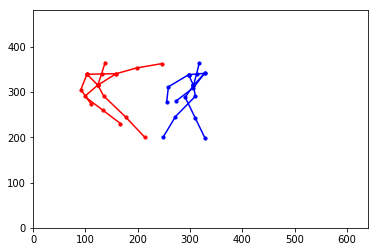

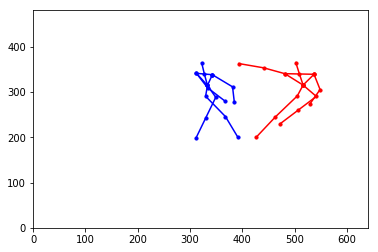

In [12]:
i = 10
draw_2d_pose([p_0[i],p_1[i]])
p_0_new, p_1_new = mirror(p_0,p_1)
draw_2d_pose([p_0_new[i],p_1_new[i]])